# Initialization
### Setting up SparkSession

In [1]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("YelpBusinessSuccessPrediction") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .getOrCreate()

# Verify Spark session
print(spark.version)


24/12/04 13:54:08 WARN Utils: Your hostname, Gowthams-MacBook-Pro-2.local resolves to a loopback address: 127.0.0.1; using 10.0.0.31 instead (on interface en0)
24/12/04 13:54:08 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/04 13:54:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/12/04 13:54:09 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/12/04 13:54:09 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


3.5.3


# Data Loading
### Loading Business and Review data from HDFS

In [2]:
# Load business data
business_df = spark.read.json("hdfs://localhost:9000/user/hadoop/yelp_data/yelp_academic_dataset_business.json")

# Load review data
review_df = spark.read.json("hdfs://localhost:9000/user/hadoop/yelp_data/yelp_academic_dataset_review.json")



24/12/04 13:54:12 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

# EDA

In [ ]:
# Display schemas to understand the data
business_df.printSchema()
review_df.printSchema()


In [3]:
# Rename the 'stars' column in the review dataset to 'review_stars'
review_df = review_df.withColumnRenamed("stars", "review_stars")

In [4]:
california_businesses = business_df.filter(business_df.state == "CA")
california_businesses.show(5)


+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|{NULL, NULL, NULL...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|Santa Barbara|                NULL|      0|   34.4266787|   -119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|    827-833 State St|{NULL, NULL, NULL...|noByYNtDLQAra9ccq...|Women's Clothing,...|Santa Barbara|{11:0-18:0, 11:0-...|      1|34.4

In [5]:
california_reviews = california_businesses.join(review_df, "business_id")
california_reviews.show(5)


Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


CodeCache: size=131072Kb used=27555Kb max_used=27566Kb free=103516Kb
 bounds [0x0000000106dc4000, 0x00000001088e4000, 0x000000010edc4000]
 total_blobs=10535 nmethods=9567 adapters=880
 compilation: disabled (not enough contiguous free space left)


+--------------------+----------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+---------------+-----------+------------+-----+-----+----+-------------------+-----+--------------------+------------+--------------------+------+--------------------+
|         business_id|         address|          attributes|          categories|         city|               hours|is_open|  latitude|   longitude|           name|postal_code|review_count|stars|state|cool|               date|funny|           review_id|review_stars|                text|useful|             user_id|
+--------------------+----------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+---------------+-----------+------------+-----+-----+----+-------------------+-----+--------------------+------------+--------------------+------+--------------------+
|q6661I3CGW0UB740E...|    418 State St|{NULL, NULL, 

In [6]:
california_reviews.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nul

In [14]:
# Count the number of records in the DataFrame
record_count = california_reviews.count()

print(f"Number of records: {record_count}")


Number of records: 348856


In [7]:
from pyspark.sql.functions import regexp_replace, col, lower

cleaned_reviews = california_reviews.withColumn(
    "cleaned_text",
    lower(regexp_replace(col("text"), "[^a-zA-Z\\s]", ""))
)
# Verify the results
cleaned_reviews.select("text", "cleaned_text").show(5, truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
from pyspark.sql.functions import avg, count

business_features = cleaned_reviews.groupBy("business_id").agg(
    avg("stars").alias("average_stars"),
    count("text").alias("review_count")
)
business_features.show(5)


+--------------------+-------------+------------+
|         business_id|average_stars|review_count|
+--------------------+-------------+------------+
|q6661I3CGW0UB740E...|          2.0|         138|
|sEBL8OtHzw2ctY69D...|          5.0|          28|
|FJhEvGx2yqJyup15x...|          4.5|           6|
|JujePuViptUIgGNia...|          5.0|           7|
|DvblBXJOWydtNFVqL...|          4.5|          17|
+--------------------+-------------+------------+
only showing top 5 rows



In [9]:
from pyspark.sql.functions import udf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

sentiment_udf = udf(get_sentiment)
sentiment_data = cleaned_reviews.withColumn("sentiment", sentiment_udf(col("cleaned_text")))


In [10]:
sentiment_data.show(5)

+--------------------+----------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+---------------+-----------+------------+-----+-----+----+-------------------+-----+--------------------+------------+--------------------+------+--------------------+--------------------+---------+
|         business_id|         address|          attributes|          categories|         city|               hours|is_open|  latitude|   longitude|           name|postal_code|review_count|stars|state|cool|               date|funny|           review_id|review_stars|                text|useful|             user_id|        cleaned_text|sentiment|
+--------------------+----------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+---------------+-----------+------------+-----+-----+----+-------------------+-----+--------------------+------------+--------------------+------+------------

In [11]:
# Display schema
california_reviews.printSchema()

# Show sample data
california_reviews.show(5)


root
 |-- business_id: string (nullable = true)
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nul

+--------------------+----------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+---------------+-----------+------------+-----+-----+----+-------------------+-----+--------------------+------------+--------------------+------+--------------------+
|         business_id|         address|          attributes|          categories|         city|               hours|is_open|  latitude|   longitude|           name|postal_code|review_count|stars|state|cool|               date|funny|           review_id|review_stars|                text|useful|             user_id|
+--------------------+----------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+---------------+-----------+------------+-----+-----+----+-------------------+-----+--------------------+------------+--------------------+------+--------------------+
|q6661I3CGW0UB740E...|    418 State St|{NULL, NULL, 

In [12]:
# Describe numerical columns
california_reviews.select("stars","review_stars", "review_count", "useful", "funny", "cool").describe().show()


+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|             stars|      review_stars|      review_count|            useful|             funny|              cool|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|            348856|            348856|            348856|            348856|            348856|            348856|
|   mean|  3.96463010525833|3.9600092874997133|453.65236659251957|1.1610291925608274|0.4035590616185475| 0.556590684981769|
| stddev|0.6649691108946356|1.4141072350087853| 637.3196503946783|3.7537118688528075| 2.130689664397578|3.0828162390327747|
|    min|               1.0|               1.0|                 5|                 0|                -1|                 0|
|    max|               5.0|               5.0|              3834|               207|               134|               184|
+-------

In [13]:
from pyspark.sql.functions import col, sum

# Calculate missing values for each column
missing_values = california_reviews.select(
    [(sum(col(c).isNull().cast("int")).alias(c)) for c in california_reviews.columns]
)
missing_values.show()


+-----------+-------+----------+----------+----+-----+-------+--------+---------+----+-----------+------------+-----+-----+----+----+-----+---------+------------+----+------+-------+
|business_id|address|attributes|categories|city|hours|is_open|latitude|longitude|name|postal_code|review_count|stars|state|cool|date|funny|review_id|review_stars|text|useful|user_id|
+-----------+-------+----------+----------+----+-----+-------+--------+---------+----+-----------+------------+-----+-----+----+----+-----+---------+------------+----+------+-------+
|          0|      0|      7486|         5|   0|20341|      0|       0|        0|   0|          0|           0|    0|    0|   0|   0|    0|        0|           0|   0|     0|      0|
+-----------+-------+----------+----------+----+-----+-------+--------+---------+----+-----------+------------+-----+-----+----+----+-----+---------+------------+----+------+-------+



In [16]:
# Top 10 businesses with the highest number of reviews
california_reviews.groupBy("business_id", "name").agg(
    sum("review_count").alias("total_reviews")
).orderBy(col("total_reviews").desc()).show(10)


+--------------------+--------------------+-------------+
|         business_id|                name|total_reviews|
+--------------------+--------------------+-------------+
|yPSejq3_erxo9zdVY...|          Los Agaves|     14910426|
|U3grYFIeu6RgAAQgd...|Brophy Bros - San...|      8828820|
|skY6r8WAkYqpV7_Tx...|Boathouse at Hend...|      6563168|
|SZU9c8V2GuREDN5Kg...|Santa Barbara She...|      5875376|
|GuzbBFraIq-fbkjfv...|          Mesa Verde|      3344152|
|6RBZfirnzE4NahJTn...|La Super-Rica Taq...|      3169718|
|EtM079Cj7-B3G7jPs...|             Sandbar|      2458140|
|znlrxrY4InSx7ekPZ...|McConnell's Fine ...|      2386961|
|oGDGlUbOjHxmmCh8Z...|            The Lark|      2374240|
|edJoBsse6nsF0BYh6...|    The Palace Grill|      2304000|
+--------------------+--------------------+-------------+
only showing top 10 rows



In [25]:
import pandas as pd
sentiments['sentiment'] = pd.to_numeric(sentiments['sentiment'], errors='coerce')


In [28]:
from pyspark.sql.functions import explode, split

# Split categories into multiple rows and count occurrences
categories = california_reviews.withColumn("category", explode(split(col("categories"), ", ")))
categories.groupBy("category").count().orderBy(col("count").desc()).show(10)


+--------------------+------+
|            category| count|
+--------------------+------+
|         Restaurants|211748|
|                Food| 97942|
|           Nightlife| 76574|
|                Bars| 72760|
|      American (New)| 53091|
|  Breakfast & Brunch| 50091|
|Event Planning & ...| 45548|
|             Seafood| 41978|
|             Mexican| 37970|
|American (Traditi...| 36703|
+--------------------+------+
only showing top 10 rows



In [31]:
from pyspark.sql.functions import col

# Convert stars and sentiment to numeric types
sentiment_data = sentiment_data.withColumn("stars", col("stars").cast("float"))
sentiment_data = sentiment_data.withColumn("sentiment", col("sentiment").cast("float"))


In [32]:
sentiment_data = sentiment_data.dropna(subset=["stars", "sentiment"])


In [33]:
correlation = sentiment_data.stat.corr("stars", "sentiment")
print(f"Correlation between stars and sentiment: {correlation}")


Correlation between stars and sentiment: 0.320646425073208


In [60]:
# Select relevant columns and convert to Pandas
stars_sentiment_pd = sentiment_data.select("stars", "sentiment").toPandas()


In [34]:
# Correlation between stars and review count
correlation = california_reviews.stat.corr("stars", "review_count")
print(f"Correlation between stars and review count: {correlation}")


Correlation between stars and review count: 0.1212959190347607


In [35]:
# Calculate average stars for each category
avg_stars_by_category = categories.groupBy("category").agg(avg("stars").alias("avg_stars")).orderBy(col("avg_stars").desc())
avg_stars_by_category.show(10)


+--------------------+---------+
|            category|avg_stars|
+--------------------+---------+
|        Wallpapering|      5.0|
|         CPR Classes|      5.0|
|Structural Engineers|      5.0|
|     Pet Photography|      5.0|
|  Lactation Services|      5.0|
|Private Investiga...|      5.0|
|              Doulas|      5.0|
|            Midwives|      5.0|
|Childbirth Education|      5.0|
|          Smokehouse|      5.0|
+--------------------+---------+
only showing top 10 rows



In [36]:
# Review count by city
city_reviews = california_reviews.groupBy("city").agg(sum("review_count").alias("total_reviews")).orderBy(col("total_reviews").desc())
city_reviews.show(10)


+--------------+-------------+
|          city|total_reviews|
+--------------+-------------+
| Santa Barbara|    139164771|
|        Goleta|     10029809|
|   Carpinteria|      4403917|
|    Isla Vista|      2791616|
|     Montecito|      1186167|
|    Summerland|       620971|
|Santa  Barbara|        21315|
|      Cerritos|        17680|
|       Truckee|         5836|
|   Real Goleta|         2070|
+--------------+-------------+
only showing top 10 rows



In [39]:
cleaned_reviews.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nul

In [42]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import explode, col

# Tokenize the text into an array of words
tokenizer = Tokenizer(inputCol="cleaned_text", outputCol="words")
tokenized = tokenizer.transform(cleaned_reviews)

# Remove stop words
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
words_filtered = remover.transform(tokenized)

# Explode the filtered words into individual rows
exploded_words = words_filtered.withColumn("word", explode(col("filtered_words")))

# Count word frequencies
word_count = exploded_words.groupBy("word").count().orderBy(col("count").desc())

# Show top 10 words
word_count.show(10)


+-------+-------+
|   word|  count|
+-------+-------+
|       |1304994|
|  great| 157263|
|   food| 153701|
|  place| 150229|
|   good| 147381|
|service| 114390|
|   time| 101438|
|    one|  95981|
|   like|  95581|
|   back|  92032|
+-------+-------+
only showing top 10 rows



In [43]:
from pyspark.sql.functions import year, count

reviews_by_year = california_reviews.withColumn("year", year(col("date"))) \
    .groupBy("year") \
    .agg(count("*").alias("review_count")) \
    .orderBy("year")

reviews_by_year.show()


+----+------------+
|year|review_count|
+----+------------+
|2005|          71|
|2006|         427|
|2007|        1691|
|2008|        3250|
|2009|        5252|
|2010|        8509|
|2011|       13766|
|2012|       16520|
|2013|       21232|
|2014|       28766|
|2015|       34781|
|2016|       37535|
|2017|       39019|
|2018|       39039|
|2019|       38036|
|2020|       28059|
|2021|       31401|
|2022|        1502|
+----+------------+



In [44]:
from pyspark.sql.functions import month, when

# Extract month
reviews_with_month = sentiment_data.withColumn("month", month(col("date")))

# Define seasons
reviews_with_season = reviews_with_month.withColumn(
    "season",
    when((col("month") == 12) | (col("month").between(1, 2)), "Winter")
    .when(col("month").between(3, 5), "Spring")
    .when(col("month").between(6, 8), "Summer")
    .when(col("month").between(9, 11), "Fall")
)


In [45]:
# Average sentiment by month
monthly_sentiment = reviews_with_season.groupBy("month").agg(
    avg("sentiment").alias("avg_sentiment")
).orderBy("month")

# Average sentiment by season
seasonal_sentiment = reviews_with_season.groupBy("season").agg(
    avg("sentiment").alias("avg_sentiment")
).orderBy("season")

monthly_sentiment.show()
seasonal_sentiment.show()


+-----+------------------+
|month|     avg_sentiment|
+-----+------------------+
|    1|0.6898261686955284|
|    2|0.6885068657765205|
|    3|0.6879969909661376|
|    4|0.6877867737124703|
|    5| 0.680016162772347|
|    6|0.6766812795050746|
|    7|0.6768130037255146|
|    8|0.6785527398424621|
|    9|0.6743692491798972|
|   10|0.6765039576779165|
|   11|0.6833621641632577|
|   12| 0.674251033252543|
+-----+------------------+



+------+------------------+
|season|     avg_sentiment|
+------+------------------+
|  Fall|0.6778037922885362|
|Spring|0.6851282775497658|
|Summer| 0.677371333111911|
|Winter|0.6845174595000563|
+------+------------------+



In [55]:
# List all nested fields in 'attributes'
attributes_fields = california_reviews.select("attributes.*").columns
print(f"Attributes fields: {attributes_fields}")


Attributes fields: ['AcceptsInsurance', 'AgesAllowed', 'Alcohol', 'Ambience', 'BYOB', 'BYOBCorkage', 'BestNights', 'BikeParking', 'BusinessAcceptsBitcoin', 'BusinessAcceptsCreditCards', 'BusinessParking', 'ByAppointmentOnly', 'Caters', 'CoatCheck', 'Corkage', 'DietaryRestrictions', 'DogsAllowed', 'DriveThru', 'GoodForDancing', 'GoodForKids', 'GoodForMeal', 'HairSpecializesIn', 'HappyHour', 'HasTV', 'Music', 'NoiseLevel', 'Open24Hours', 'OutdoorSeating', 'RestaurantsAttire', 'RestaurantsCounterService', 'RestaurantsDelivery', 'RestaurantsGoodForGroups', 'RestaurantsPriceRange2', 'RestaurantsReservations', 'RestaurantsTableService', 'RestaurantsTakeOut', 'Smoking', 'WheelchairAccessible', 'WiFi']


In [59]:
from pyspark.sql.functions import col, when
from functools import reduce

# Generate expressions to count non-null fields in 'attributes'
attribute_count_columns = [
    when(col(f"attributes.{field}").isNotNull(), 1).otherwise(0) for field in attributes_fields
]

# Use reduce to sum all non-null field counts
attributes_count_expr = reduce(lambda x, y: x + y, attribute_count_columns)

# Add the count as a new column
california_reviews = california_reviews.withColumn("attributes_count", attributes_count_expr)

# Check the result
california_reviews.select("attributes", "attributes_count").show(5, truncate=False)


+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+
|attributes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [63]:
from pyspark.sql.functions import when, col

# Create the label column
sentiment_data = sentiment_data.withColumn("label", when(col("stars") > 4, 1).otherwise(0))

# Verify the distribution of labels
sentiment_data.groupBy("label").count().show()


+-----+------+
|label| count|
+-----+------+
|    1|124567|
|    0|224289|
+-----+------+



In [64]:
from pyspark.sql.functions import length

# Create review_length column based on the length of the review text
sentiment_data = sentiment_data.withColumn("review_length", length(col("text")))

# Check the new column
sentiment_data.select("text", "review_length").show(5, truncate=False)


+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|text                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [66]:
from pyspark.sql.functions import col, when
from functools import reduce

# List all nested fields in the 'attributes' column
attributes_fields = sentiment_data.select("attributes.*").columns

# Generate expressions to count non-null fields in 'attributes'
attribute_count_columns = [
    when(col(f"attributes.{field}").isNotNull(), 1).otherwise(0) for field in attributes_fields
]

# Use reduce to sum all non-null field counts
attributes_count_expr = reduce(lambda x, y: x + y, attribute_count_columns)

# Add the count as a new column
sentiment_data = sentiment_data.withColumn("attributes_count", attributes_count_expr)

# Verify the new column
sentiment_data.select("attributes", "attributes_count").show(5, truncate=False)


+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+
|attributes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

# Visualizaions

/var/folders/94/fccvw0s97s92t57vw5_1jmk80000gn/T/ipykernel_12308/1393463829.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sentiments['sentiment'], shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


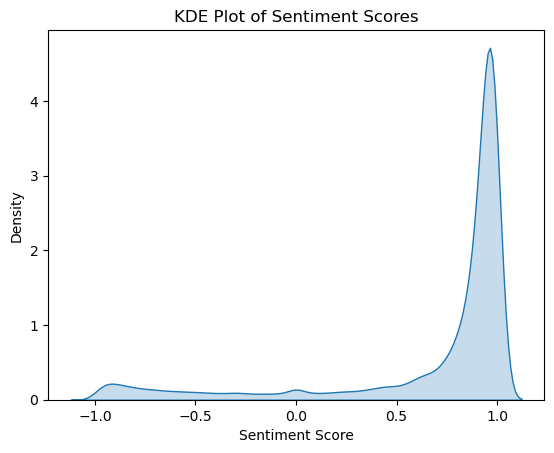

In [26]:
sns.kdeplot(sentiments['sentiment'], shade=True)
plt.title('KDE Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()


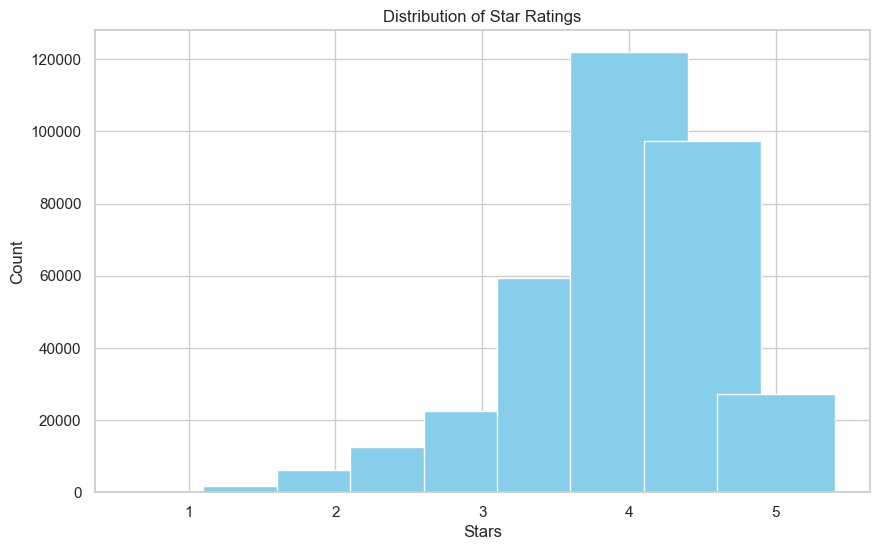

In [97]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import DenseVector
import seaborn as sns

# 1. Bar Chart: Distribution of Star Ratings
stars_distribution = sentiment_data.groupBy("stars").count().orderBy("stars").toPandas()
plt.figure(figsize=(10, 6))
plt.bar(stars_distribution['stars'], stars_distribution['count'], color='skyblue')
plt.title("Distribution of Star Ratings")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.xticks(range(1, 6))  # Assuming star ratings are between 1 and 5
plt.show()



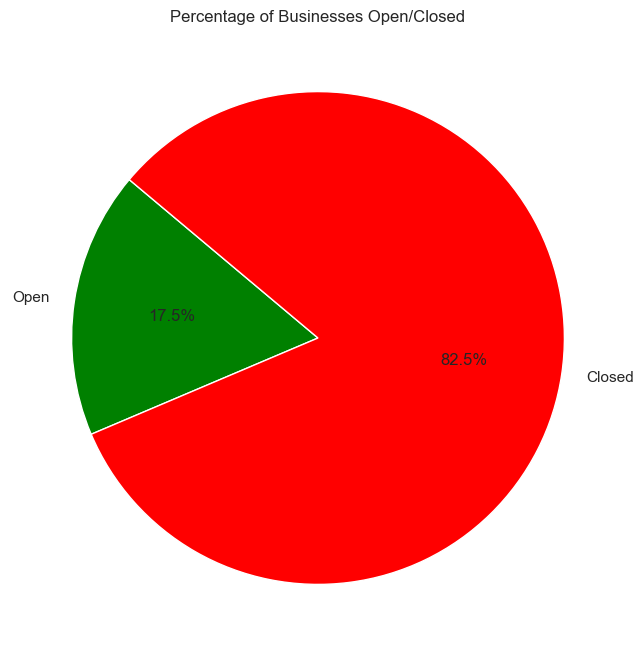

In [98]:
# 2. Pie Chart: Percentage of Businesses Open/Closed
is_open_distribution = sentiment_data.groupBy("is_open").count().toPandas()
labels = ["Open", "Closed"]
plt.figure(figsize=(8, 8))
plt.pie(is_open_distribution['count'], labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title("Percentage of Businesses Open/Closed")
plt.show()



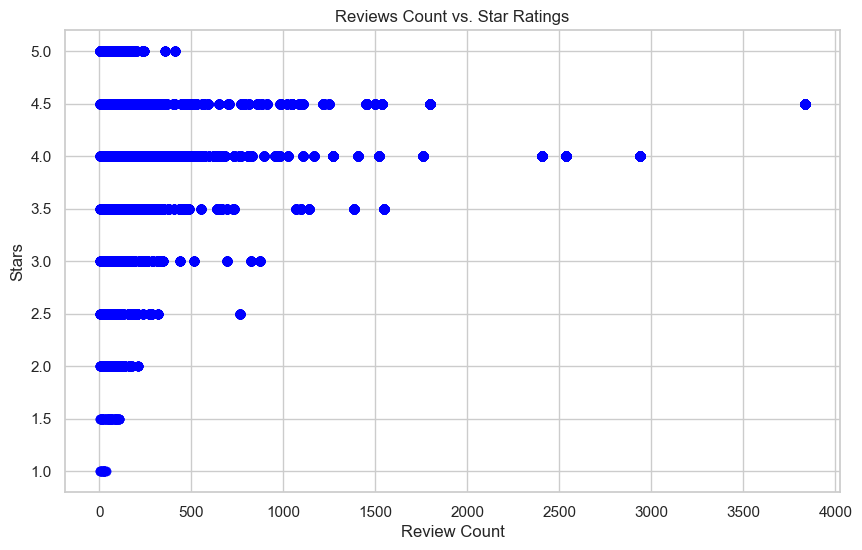

In [100]:
# 3. Scatter Plot: Reviews Count vs. Star Ratings
reviews_vs_stars = sentiment_data.select("review_count", "stars").sample(False, 0.1).toPandas()
plt.figure(figsize=(10, 6))
plt.scatter(reviews_vs_stars['review_count'], reviews_vs_stars['stars'], alpha=0.5, color='blue')
plt.title("Reviews Count vs. Star Ratings")
plt.xlabel("Review Count")
plt.ylabel("Stars")
plt.show()



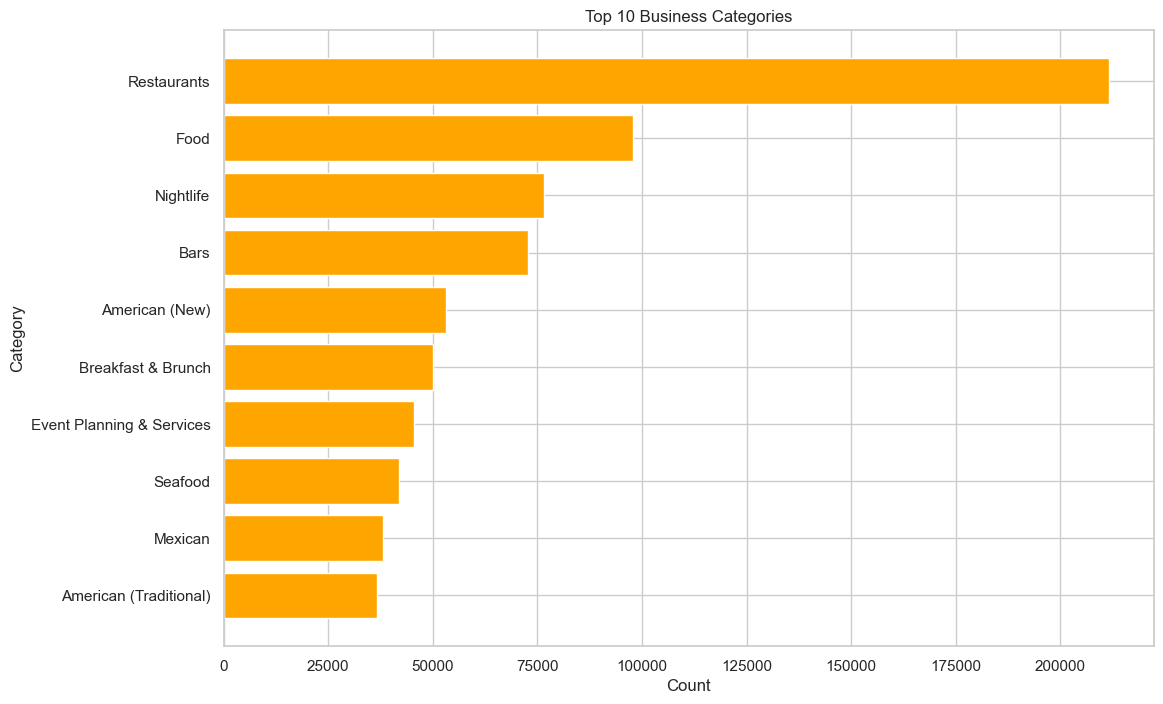

In [101]:
# 4. Bar Chart: Top Categories by Count
categories = sentiment_data.select(F.explode(F.split("categories", ", ")).alias("category"))
top_categories = categories.groupBy("category").count().orderBy(F.desc("count")).limit(10).toPandas()
plt.figure(figsize=(12, 8))
plt.barh(top_categories['category'], top_categories['count'], color='orange')
plt.title("Top 10 Business Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.gca().invert_yaxis()
plt.show()

24/12/05 17:10:37 ERROR RetryingBlockTransferor: Exception while beginning fetch of 1 outstanding blocks (after 2 retries)
java.io.IOException: Connecting to /10.0.0.31:57162 failed in the last 4750 ms, fail this connection directly
	at org.apache.spark.network.client.TransportClientFactory.createClient(TransportClientFactory.java:210)
	at org.apache.spark.network.netty.NettyBlockTransferService$$anon$2.createAndStart(NettyBlockTransferService.scala:131)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.transferAllOutstanding(RetryingBlockTransferor.java:173)
	at org.apache.spark.network.shuffle.RetryingBlockTransferor.lambda$initiateRetry$0(RetryingBlockTransferor.java:206)
	at java.util.concurrent.Executors$RunnableAdapter.call(Executors.java:511)
	at java.util.concurrent.FutureTask.run(FutureTask.java:266)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)


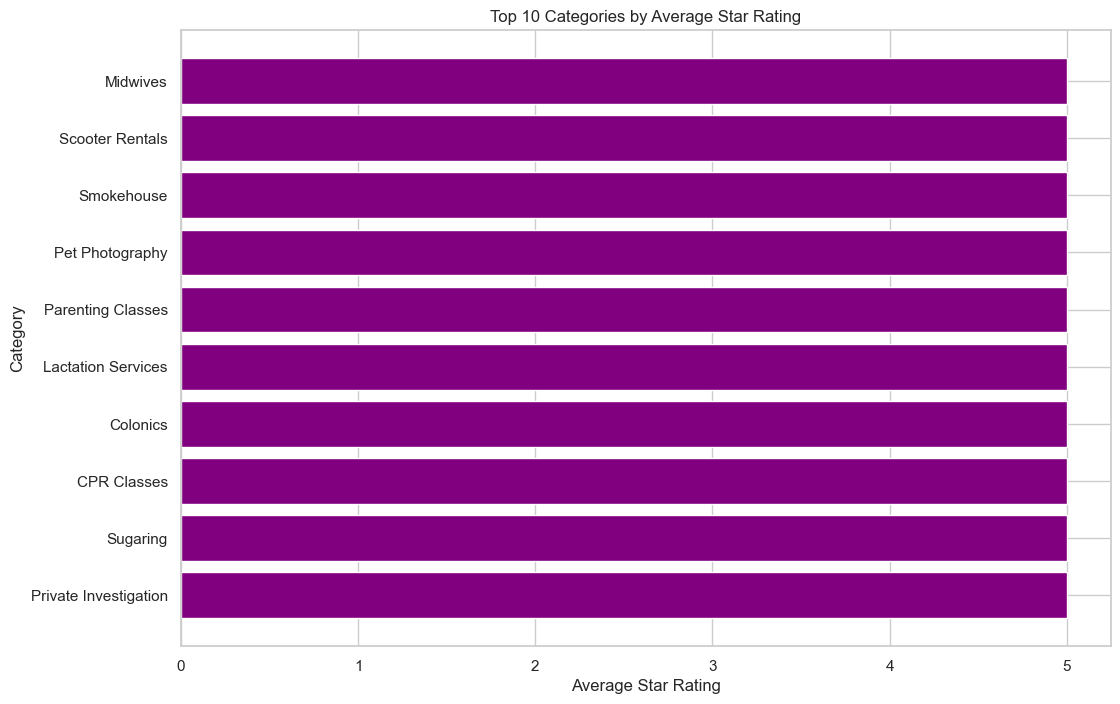

In [131]:
# Explode categories and calculate average star rating for each category
category_ratings = sentiment_data.select(F.explode(F.split("categories", ", ")).alias("category"), "stars") \
    .groupBy("category") \
    .agg(F.avg("stars").alias("avg_rating")) \
    .orderBy(F.desc("avg_rating")) \
    .limit(10) \
    .toPandas()

# Plot
plt.figure(figsize=(12, 8))
plt.barh(category_ratings["category"], category_ratings["avg_rating"], color="purple")
plt.title("Top 10 Categories by Average Star Rating")
plt.xlabel("Average Star Rating")
plt.ylabel("Category")
plt.gca().invert_yaxis()
plt.show()


# Modelling

In [67]:
# Check available columns
print(c.columns)


['business_id', 'address', 'attributes', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'review_count', 'stars', 'state', 'cool', 'date', 'funny', 'review_id', 'review_stars', 'text', 'useful', 'user_id', 'cleaned_text', 'sentiment', 'label', 'review_length', 'attributes_count']


In [68]:
# Define feature columns (with attributes_count)
feature_cols = ["sentiment", "review_length", "useful", "funny", "cool", "review_count", "attributes_count"]

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
sentiment_data = assembler.transform(sentiment_data)


In [69]:
# Train-test split
train_data, test_data = sentiment_data.randomSplit([0.8, 0.2], seed=42)


In [70]:
# Initialize Logistic Regression
log_reg = LogisticRegression(featuresCol="features", labelCol="label")

# Train the model
log_reg_model = log_reg.fit(train_data)

# View model coefficients
print(f"Coefficients: {log_reg_model.coefficients}")
print(f"Intercept: {log_reg_model.intercept}")


24/12/05 11:31:47 WARN DAGScheduler: Broadcasting large task binary with size 1062.3 KiB
24/12/05 11:32:08 WARN DAGScheduler: Broadcasting large task binary with size 1063.4 KiB
24/12/05 11:32:08 WARN DAGScheduler: Broadcasting large task binary with size 1062.9 KiB
24/12/05 11:32:25 WARN DAGScheduler: Broadcasting large task binary with size 1064.0 KiB
24/12/05 11:32:25 WARN DAGScheduler: Broadcasting large task binary with size 1062.9 KiB
24/12/05 11:32:25 WARN DAGScheduler: Broadcasting large task binary with size 1064.0 KiB
24/12/05 11:32:25 WARN DAGScheduler: Broadcasting large task binary with size 1062.9 KiB
24/12/05 11:32:25 WARN DAGScheduler: Broadcasting large task binary with size 1064.0 KiB
24/12/05 11:32:25 WARN DAGScheduler: Broadcasting large task binary with size 1062.9 KiB
24/12/05 11:32:25 WARN DAGScheduler: Broadcasting large task binary with size 1064.0 KiB
24/12/05 11:32:25 WARN DAGScheduler: Broadcasting large task binary with size 1062.9 KiB
24/12/05 11:32:25 WAR

Coefficients: [0.9973386008772694,-0.0002660536313165075,-0.018124390573712935,-0.07949783500647582,0.08058164113653385,0.00045213689961551366,-0.055569563157963985]
Intercept: -0.5296934666974579


In [73]:
# Predict on test data
predictions = log_reg_model.transform(test_data)

# Show predictions
predictions.select("features", "label", "prediction", "probability").show(5)


24/12/05 12:06:19 WARN DAGScheduler: Broadcasting large task binary with size 1059.5 KiB


+--------------------+-----+----------+--------------------+
|            features|label|prediction|         probability|
+--------------------+-----+----------+--------------------+
|[-0.7720000147819...|    0|       0.0|[0.94636703567768...|
|[0.43479999899864...|    0|       0.0|[0.87229180386439...|
|[-0.0900000035762...|    0|       0.0|[0.87699113668258...|
|[0.94499999284744...|    0|       0.0|[0.72856105165598...|
|[0.95649999380111...|    0|       0.0|[0.70468522385170...|
+--------------------+-----+----------+--------------------+
only showing top 5 rows



In [74]:
# Evaluate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

# Evaluate F1 Score
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions)
print(f"F1 Score: {f1_score}")


24/12/05 12:12:41 WARN DAGScheduler: Broadcasting large task binary with size 1063.3 KiB


Accuracy: 0.6606075375947934


24/12/05 12:18:55 WARN DAGScheduler: Broadcasting large task binary with size 1063.3 KiB


F1 Score: 0.6301376011965869
